In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import os
import sys

In [2]:
#1. Reading the dataset

data = pd.read_csv('pubg - Dr. Darshan Ingle.csv')

In [3]:
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2f262dd9795e60,78437bcd91d40e,d5db3a49eb2955,0,0,0.0,0,0,0,92,...,0,0.0,0,0.0,0,0,0.00,0,1470,0.0000
1,a32847cf5bf34b,85b7ce5a12e10b,65223f05c7fdb4,0,0,163.2,1,1,0,42,...,0,0.0,0,0.0,0,0,132.70,2,1531,0.2222
2,1b1900a9990396,edf80d6523380a,1cadec4534f30a,0,3,278.7,2,1,8,16,...,3,0.0,0,0.0,0,0,3591.00,10,0,0.8571
3,f589dd03b60bf2,804ab5e5585558,c4a5676dc91604,0,0,191.9,1,0,0,31,...,0,0.0,0,0.0,0,0,332.70,3,0,0.3462
4,c23c4cc5b78b35,b3e2cd169ed920,cd595700a01bfa,0,0,100.0,1,0,0,87,...,0,0.0,0,0.0,0,0,252.70,3,1557,0.0690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ef4f474acd8e85,2eca2a8391f75d,492ecdfae90b46,0,3,204.5,1,0,0,17,...,3,0.0,0,0.0,0,0,1648.00,4,1471,0.8333
9996,cf0bf82fb4d80e,2eaf2765f93adb,14bffd71e96320,0,0,0.0,0,0,0,49,...,0,0.0,0,0.0,0,0,897.10,6,1500,0.7174
9997,a0a31a0b1dcbe1,8d50c64ccc5071,147e4bbb62e3bb,0,0,0.0,0,0,0,83,...,0,0.0,0,0.0,0,0,188.20,2,1434,0.2083
9998,f6874657399d69,d31843d7e62ccb,662567dcf280f5,0,0,0.0,0,0,0,82,...,0,0.0,0,0.0,0,0,108.10,5,1534,0.2449


In [4]:
#2.  Checking the datatype of all the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               10000 non-null  object 
 1   groupId          10000 non-null  object 
 2   matchId          10000 non-null  object 
 3   assists          10000 non-null  int64  
 4   boosts           10000 non-null  int64  
 5   damageDealt      10000 non-null  float64
 6   DBNOs            10000 non-null  int64  
 7   headshotKills    10000 non-null  int64  
 8   heals            10000 non-null  int64  
 9   killPlace        10000 non-null  int64  
 10  killPoints       10000 non-null  int64  
 11  kills            10000 non-null  int64  
 12  killStreaks      10000 non-null  int64  
 13  longestKill      10000 non-null  float64
 14  matchDuration    10000 non-null  int64  
 15  matchType        10000 non-null  object 
 16  maxPlace         10000 non-null  int64  
 17  numGroups    

In [7]:
#3. Finding the summary of all the numerical columns and write your findings about 

data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.0000,10000.000000
mean,0.234600,1.088500,129.211264,0.64400,0.221700,1.354000,47.663100,506.970200,0.913400,0.543800,...,0.160200,600.693584,0.004200,4.385917,0.024400,0.007700,1130.008410,3.63590,609.3440,0.469926
std,0.575149,1.703279,167.193945,1.09562,0.577046,2.629102,27.424146,627.297959,1.524117,0.701948,...,0.454045,1524.915601,0.074719,30.889620,0.171486,0.089674,1168.597983,2.42209,739.7924,0.304508
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151.575000,2.00000,0.0000,0.200000
50%,0.000000,0.000000,83.805000,0.00000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,650.350000,3.00000,0.0000,0.458300
75%,0.000000,2.000000,185.325000,1.00000,0.000000,2.000000,71.000000,1169.000000,1.000000,1.000000,...,0.000000,0.000575,0.000000,0.000000,0.000000,0.000000,1923.250000,5.00000,1495.0000,0.735100
max,7.000000,18.000000,3469.000000,11.00000,14.000000,31.000000,100.000000,1926.000000,35.000000,4.000000,...,5.000000,28780.000000,3.000000,971.200000,3.000000,2.000000,10490.000000,41.00000,1863.0000,1.000000


In [11]:
#4. The average person kills how many players

data['kills'].mean()

0.9134

In [12]:
#6. The most kills ever recorded are how much?

data['kills'].max()

35

In [13]:
#7.  Printing all the columns of the dataframe. 

data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

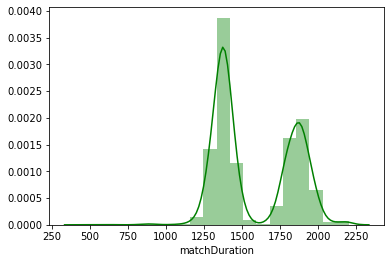

In [18]:
#7.  Comment on distribution of the match's duration. 
# Using seaborn

sns.distplot(data['matchDuration'], color = 'green', bins = 20)

From the above graph observation, we can draw a conclusion that, the matchduration is graduaaly increased between 1250 to 1500, and then it has a slight increse between 1750 to 2000.

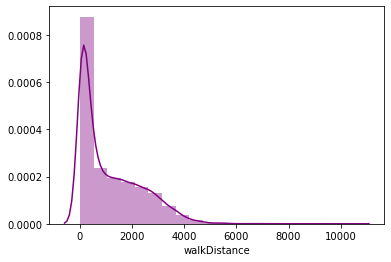

In [20]:
#8. Comment on distribution of the walk distance.
# Using sesaborn

sns.distplot(data['walkDistance'], color = 'purple', bins = 20)

From the above plot we can conclude that, the walk distance is gradualy decreasing.

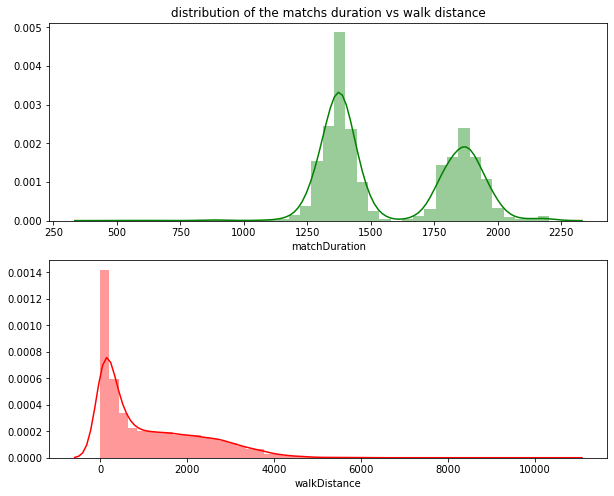

In [27]:
#9. .Plot distribution of the match's duration vs walk distance one below the other. 

plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
sns.distplot(data['matchDuration'], color = 'green')
plt.title('distribution of the matchs duration vs walk distance')
          
plt.subplot(2,1,2)
sns.distplot(data['walkDistance'], color = 'red')
          

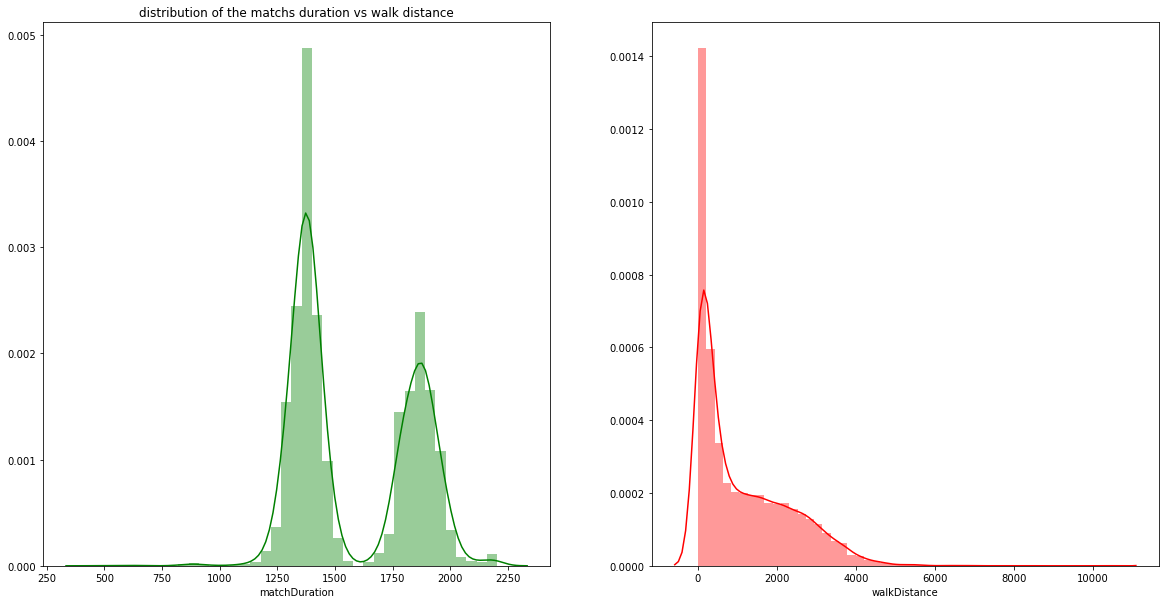

In [31]:
#11. Plot distribution of the match's duration vs walk distance side by side

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.distplot(data['matchDuration'], color = 'green')
plt.title('distribution of the matchs duration vs walk distance')
          
plt.subplot(1,2,2)
sns.distplot(data['walkDistance'], color = 'red')
          

In [ ]:
# 12. Pairplot the dataframe. Comment on kills vs damage dealt, Comment on maxPlace vs numGroups

sns.pairplot(data)

In [51]:
#13. How many unique values are there in 'matchType' and what are their counts?

data['matchType'].unique()


array(['squad-fpp', 'squad', 'duo-fpp', 'solo-fpp', 'duo', 'solo',
       'crashfpp', 'flaretpp', 'normal-squad-fpp', 'normal-duo-fpp',
       'flarefpp', 'normal-squad', 'normal-solo-fpp', 'crashtpp'],
      dtype=object)

In [52]:
data['matchType'].nunique()

14

In [49]:
data['matchType'].value_counts()

squad-fpp           3969
duo-fpp             2282
squad               1359
solo-fpp            1234
duo                  702
solo                 386
normal-squad-fpp      24
crashfpp              13
normal-duo-fpp        13
normal-solo-fpp        8
normal-squad           4
flaretpp               3
crashtpp               2
flarefpp               1
Name: matchType, dtype: int64

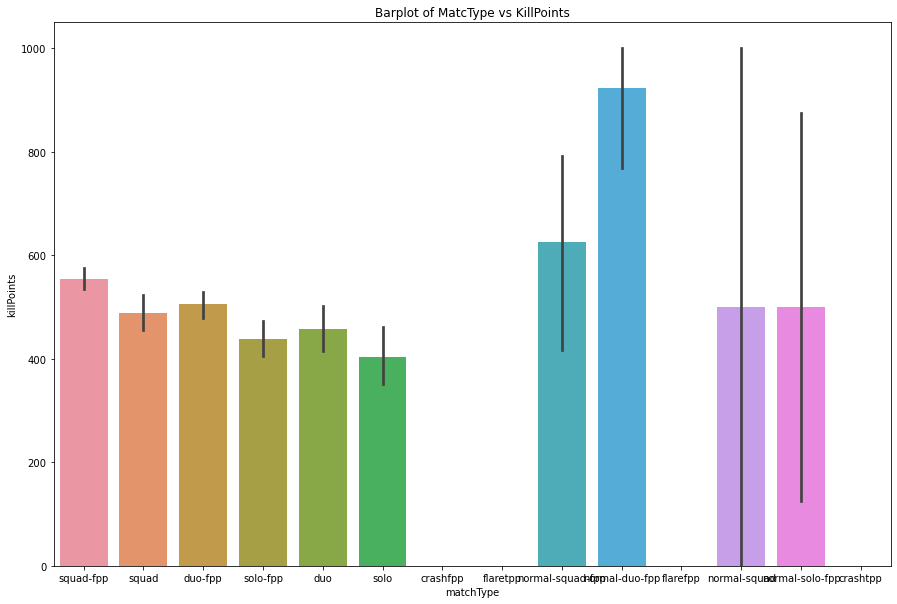

In [85]:
# 14. Plot a barplot of ‘matchType’ vs 'killPoints'. Write your inferences.

plt.figure(figsize = (15,10))
sns.barplot(x = 'matchType',
            y = 'killPoints',
            data = data)
plt.title('Barplot of MatcType vs KillPoints')
plt.show()

From the above plot, we can conclude that, in the 'matchType' normal-duo-fpp , we have higher rate of 'killPoints', whereas, in the othehand, in the 'matchType' flarefpp, and crashtpp there are no 'killPoints'i.e., the rate of killPoints is completely zero.

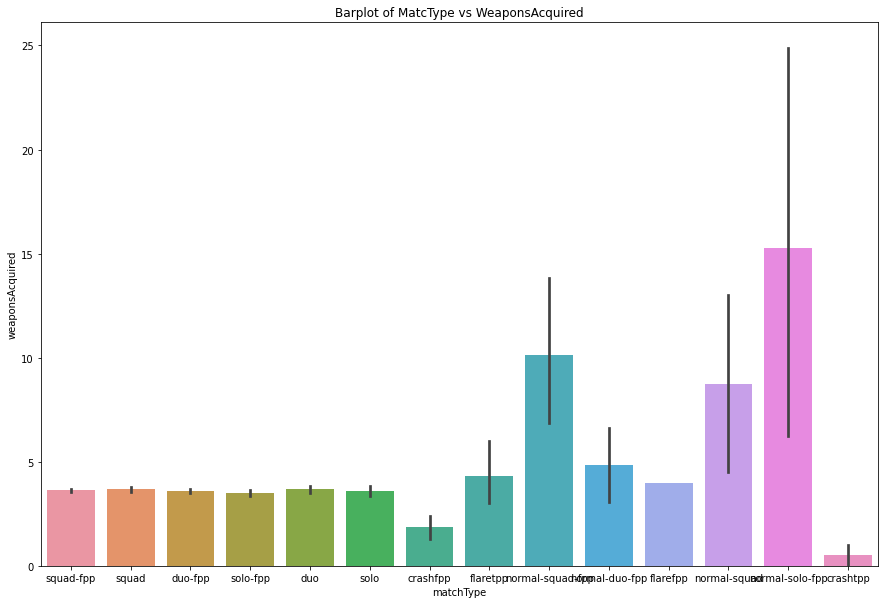

In [86]:
#15. Plot a barplot of ‘matchType’ vs ‘weaponsAcquired’. Write your inferences

plt.figure(figsize = (15,10))
sns.barplot(x = 'matchType',
            y = 'weaponsAcquired',
            data = data)
plt.title('Barplot of MatcType vs WeaponsAcquired')
plt.show()

From the above plot, we can conclude that, in the matchType normal-squad-fpp, more weapons are acquired by th players.
whereas, in the matchtype normal-solo-fpp , the less weapons have been acquired buy the playres.

In [ ]:
#16. Find the Categorical columns. 

In [97]:
cols = data.columns
num_cols = data._get_numeric_data().columns
num_cols

# Finding the categorial columns in the dataset.

cat_cols = list(set(cols) - set(num_cols))
cat_cols

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

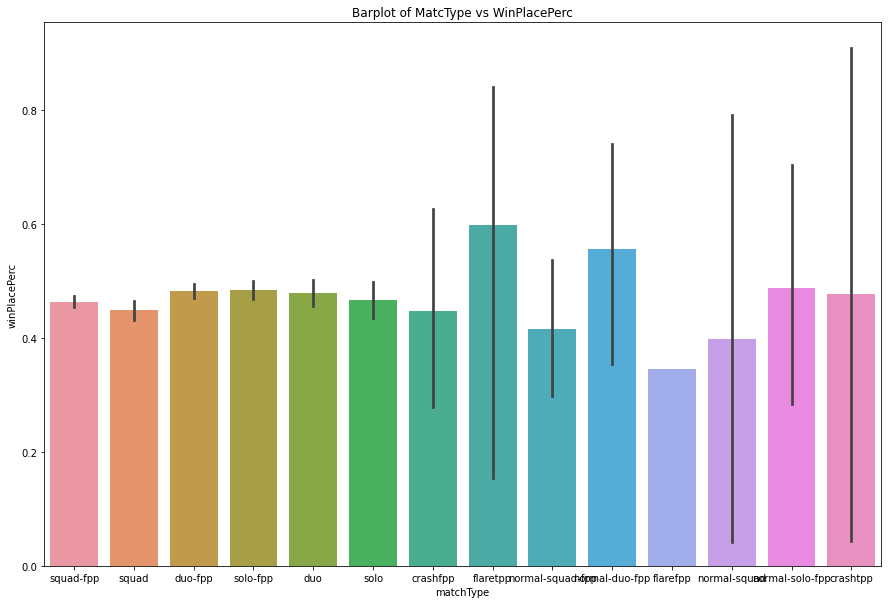

In [100]:
# 17. Plot a boxplot of ‘matchType’ vs ‘winPlacePerc’. Write your inferences.

plt.figure(figsize = (15,10))
sns.barplot(x = 'matchType',
            y = 'winPlacePerc',
            data = data)
plt.title('Barplot of MatcType vs WinPlacePerc')
plt.show()

From the above plot, we can conclude that, in the matchType crashfpp , we have maximum winPlacePerc.
whereas, in the matchType normal-duo-fpp we have least winPlacePerc.

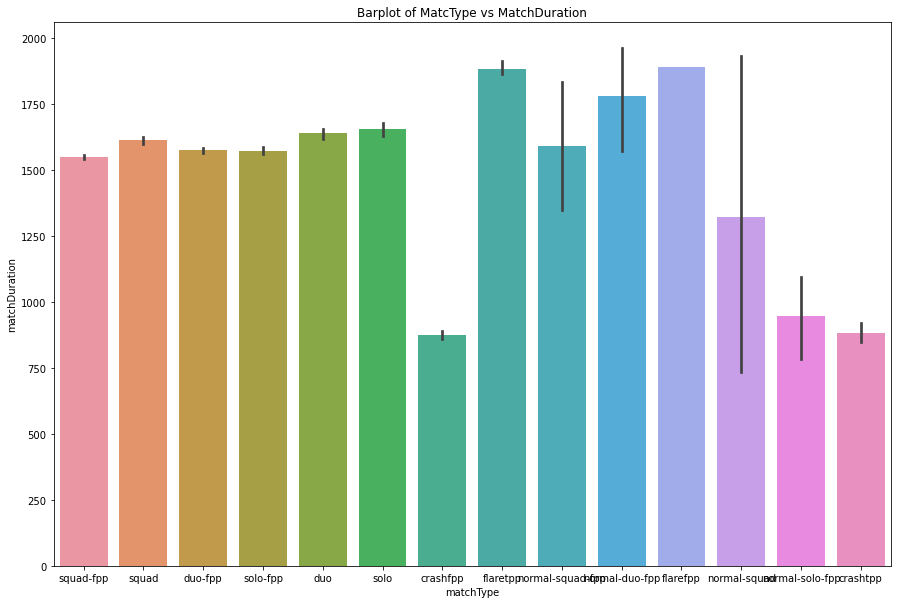

In [102]:
# 18.Plot a boxplot of ‘matchType’ vs ‘matchDuration’. Write your inferences. 

plt.figure(figsize = (15,10))
sns.barplot(x = 'matchType',
            y = 'matchDuration',
            data = data)
plt.title('Barplot of MatcType vs MatchDuration')
plt.show()

From the above plot, we can conclude that, in the matchType flarefpp, we have maximum matchduration. Whereas, in the matchType crashfpp, we have least matchDuration. 

In [ ]:
# #19.Changing the orientation of the above plot to horizontal. 


plt.figure(figsize = (15,10))
sns.barplot(x = 'matchType',
             y = 'matchDuration',orient = 'h',
             data = data)
plt.title('Barplot of MatcType vs MatchDuration')
plt.show()


In [ ]:
#20. Add a new column called ‘KILL’ which contains the sum of following columns viz. headshotKills, teamKills, roadKills. 


In [175]:
x = data['headshotKills'].sum()
x

2217

In [176]:
y = data['teamKills'].sum()
y

244

In [178]:
z = data['roadKills'].sum()
z

42

In [203]:
kills = pd.DataFrame({'sum':[2214,224,42]})

In [211]:
data['KILLS'] = kills
data['KILLS'] = data['KILLS'].fillna(0)
data.head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,KILLS
0,2f262dd9795e60,78437bcd91d40e,d5db3a49eb2955,0,0,0.0,0,0,0,92,...,0.0,0,0.0,0,0,0.0,0,1470,0.0000,2214.0
1,a32847cf5bf34b,85b7ce5a12e10b,65223f05c7fdb4,0,0,163.2,1,1,0,42,...,0.0,0,0.0,0,0,132.7,2,1531,0.2222,224.0
2,1b1900a9990396,edf80d6523380a,1cadec4534f30a,0,3,278.7,2,1,8,16,...,0.0,0,0.0,0,0,3591.0,10,0,0.8571,42.0
3,f589dd03b60bf2,804ab5e5585558,c4a5676dc91604,0,0,191.9,1,0,0,31,...,0.0,0,0.0,0,0,332.7,3,0,0.3462,0.0
4,c23c4cc5b78b35,b3e2cd169ed920,cd595700a01bfa,0,0,100.0,1,0,0,87,...,0.0,0,0.0,0,0,252.7,3,1557,0.0690,0.0


In [205]:
# 1 column got added
data.shape

(10000, 30)

In [172]:
# 21. Round off column ‘winPlacePerc’ to 2 decimals. 

data['winPlacePerc'].round(decimals = 2)

0       0.00
1       0.22
2       0.86
3       0.35
4       0.07
        ... 
9995    0.83
9996    0.72
9997    0.21
9998    0.24
9999    0.19
Name: winPlacePerc, Length: 10000, dtype: float64

In [ ]:
#22. Take a sample of size 50 from the column damageDealt for 100 times and calculate its mean. Plot it on a histogram and comment on its distribution.

In [186]:
x = data['damageDealt'].head(50)

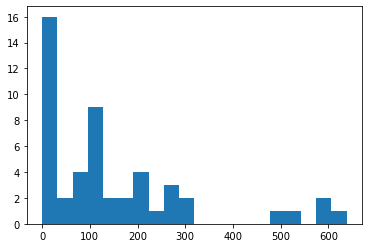

In [188]:
# Histogram plot
plt.hist(x, bins = 20)
plt.show()